The goal of this sheet is to work through the exercises in *Bayesian Data Analysis, Third Edition* by Gelman, Carlin, Stern, Dunson, Vehtari, and Rubin. Various datasets and solutions are available at http://www.stat.columbia.edu/~gelman/book/

**1**. Suppose you have a Beta(4, 4) prior distribution on the probability $\theta$ that a coin will yield a 'head' when spun in a specified manner. The coin is independently spun ten times, and 'heads' appear fewer than 3 times. You are not told how many heads were seen, only that the number is less than 3. Calculate your exact posterior density (up to a proportionality constant) for $\theta$ and sketch it.

$\newcommand{\given}{\;\lvert\;}$
We have
$$
\begin{align}
P(\theta \given y) &\propto P(y \given \theta) \cdot P(\theta) \\
&= \big( P(y = 0 \given \theta) + P(y = 1 \given \theta) + P(y = 2 \given \theta) \big) \cdot \beta(4, 4) \\
&= \big((1 - \theta)^{10} + 10 \cdot \theta(1 - \theta)^{9} + 45 \cdot \theta^{2}(1 - \theta)^{8} \big) \cdot \beta(4, 4)
\end{align}
$$
Note also that $\beta(4, 4) \propto \theta^{3} (1 - \theta)^{3}$, so we have
$$
(\theta \given y) \propto \big((1 - \theta)^{10} + 10 \cdot \theta(1 - \theta)^{9} + 45 \cdot \theta^{2}(1 - \theta)^{8} \big) \cdot \theta^{3} (1 - \theta)^{3}
$$

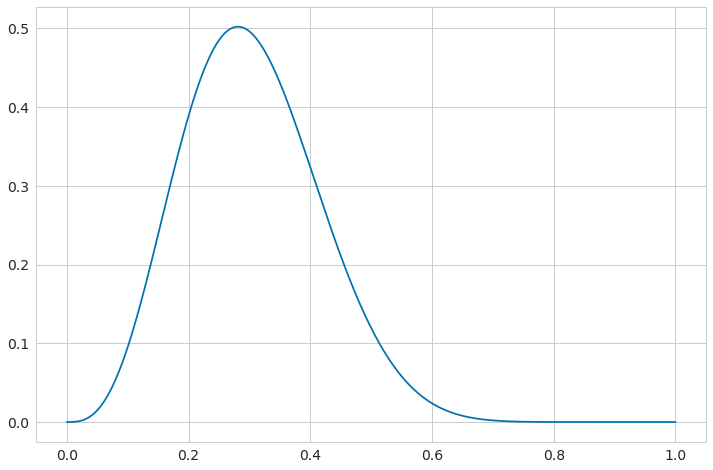

In [42]:
# Plot the top expression from above, using the beta distribution from scipy.stats

# Some plotting configuration
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc={'figure.figsize': (12, 8), 'xtick.labelsize': 14, 'ytick.labelsize': 14})
sns.set_style('whitegrid')
sns.set_palette(sns.color_palette('colorblind', 8))

import scipy.stats as stats
from scipy.special import binom
import numpy as np
x = np.linspace(0, 1, 1000)
y = sum(binom(10, k) * x**k * (1-x)**(10 - k) for k in range(3)) * stats.beta.pdf(x, 4, 4)
plt.plot(x, y);

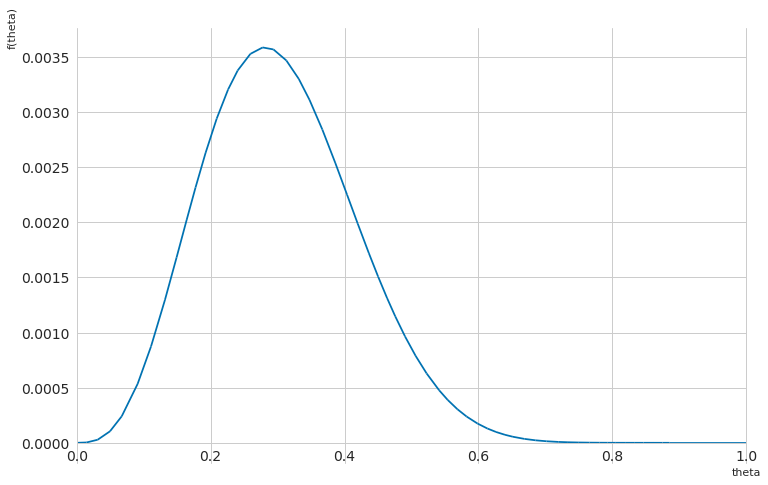

In [323]:
# Simplify the bottom expression, and plot it instead. As expected, the graph is the same
# up to the scaling of the y-axis.
import sympy as sy
sy.init_printing(use_unicode=True, wrap_line=False, no_global=True)
theta = sy.abc.theta
simp = (sum(sy.Integer(binom(10, k)) * theta**k * (1-theta)**(10 - k) for k in range(3)) * 
            (theta**3 * (1 - theta)**3))
sy.plot(simp, (theta, 0, 1));
simp.simplify()

**2**. Consider two coins $C_1, C_2$ with the following characteristics: $Pr(\text{ heads} \given C_1) = 0.6$ and
$Pr(\text{ heads} \given C_2) = 0.4$. Choose one of the coins at random and imagine spinning it repeatedly. Given that the first two spins from the chosen coin are tails, what is the expectation of the number of additional spins until a head shows up?

First we find the posterior distribution on $\theta = Pr(\text{ heads })$ given data $y$ of two consecutive tails.

Case 1: $\theta = 0.6$
$$
\begin{align}
P(\theta \given y) &= \frac{P(y \given \theta) P(\theta)}{P(y)} \\
                   &= \frac{(0.4)^2 \cdot (0.5)}{(0.5)(0.4)^2 + (0.5)(0.6)^2}
\end{align}
$$
Case 2: $\theta = 0.4$
$$
\begin{align}
P(\theta \given y) &= \frac{P(y \given \theta) P(\theta)}{P(y)} \\
                   &= \frac{(0.6)^2 \cdot (0.5)}{(0.5)(0.4)^2 + (0.5)(0.6)^2}
\end{align}
$$

In [47]:
t1 = sy.S(6) / 10
t2 = sy.S(4) / 10
prior_t1 = prior_t2 = sy.S(1) / 2

P_y = prior_t1 * (t1)**2 + prior_t2 * (t2)**2
posterior_t1 = (1 - t1)**2 * prior_t1 / P_y
posterior_t2 = (1 - t2)**2 * prior_t2 / P_y
(posterior_t1, posterior_t2), (sy.N(posterior_t1), sy.N(posterior_t2))

Let $n$ be the number of additional spins until a head appears. This is the definition of the geometric distribution, so $E(n \given \theta) = \frac{1}{\theta}$. For no good reason, here is a derivation:


If we know $\theta$, then by definition 
$E(n \given \theta) = \sum_{i=1}^{\infty} i (1-\theta)^{i-1} \theta$.

To evaluate this, let  $$
\begin{align}
S     &= \sum_{i=1}^{\infty} i(1-x)^{i-1}x \text{ and }\\
f(x)  &= \frac{1}{1 - x} = \sum_{i=0}^{\infty} x^i
\end{align}
$$
By differentiating, we can get something close to $S$:
$$
\begin{align}
f'(x) &= -(1 - x)^{-2}(-1) = \frac{1}{(1 - x)^2} \\
      &= \sum_{i=1}^{\infty} i x^{i - 1}
\end{align}
$$
Now with a substitution and a multiplication, we can get what we want. Let $\tilde{x} = 1 - x$. Then $$
\begin{align}
x f'(\tilde{x}) &= \sum_{i=1}^\infty x i  (1 - x)^{i - 1} = S \\
                &= \frac{x}{(1 - (1 - x))^2} = \frac{1}{x}
\end{align}
$$

We are looking for 
$$
E(n \given y) = E\big(E(n \given y, \theta) \given y\big)
$$

We just found that $E(n \given y, \theta) = \frac{1}{\theta}$, so what we want is $$
E\left( \frac{1}{\theta} \given y \right)
$$
which is simply $$
\frac{P(\theta_1 \given y)}{\theta_1} + \frac{P(\theta_2 \given y)}{\theta_2}
$$

In [48]:
answer = posterior_t1 / t1 + posterior_t2 / t2
answer, sy.N(answer)

**3**. Let $y$ be the number of 6's in 1000 rolls of a fair die.

**(a)** Sketch the approximate distribution of $y$, based on the normal distribution

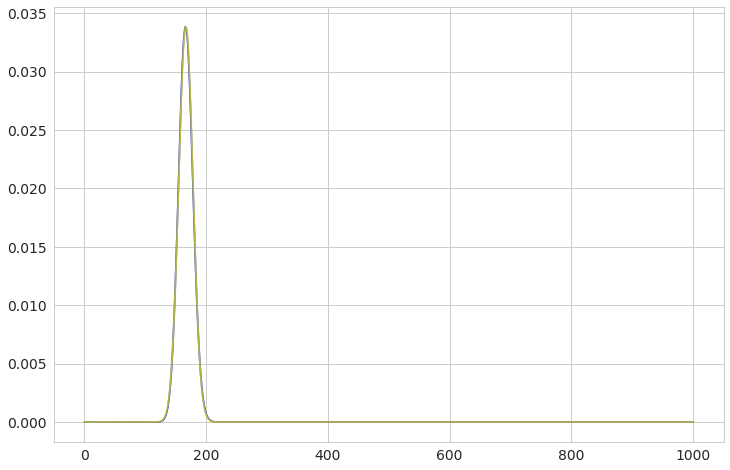

In [16]:
p = 1/6
n = 1000
x = range(n + 1)

# Plot of exact distribution
y_exact = stats.binom.pmf(x, n, p)
plt.plot(x, y_exact, color='blue');

# Plot of normal approximation
y_approx = stats.norm.pdf(x, n * p, np.sqrt(n * p * (1 - p)))
plt.plot(x, y_approx, color='yellow', alpha=0.7);

**(b)** Give approximate 5%, 25%, 50%, 75%, and 95% points for the distribution of $y$.

In [20]:
# Exact values
quantiles = (0.05, 0.25, 0.5, 0.75, 0.95)
print(stats.binom.ppf(quantiles, n, p))

# Approximate values
print(stats.norm.ppf(quantiles, n*p, np.sqrt(n*p*(1-p))))

[147. 159. 167. 175. 186.]
[147.28188077 158.71772873 166.66666667 174.6156046  186.05145256]


**4**. Let $\theta$ be the probability that a possibly biased die lands on $6$. Suppose the prior distribution for $\theta$ is $$
\begin{align}
Pr(\theta = 1/12) &= 1/4 \\
Pr(\theta = 1/6) &= 1/2 \\
Pr(\theta = 1/4) &= 1/4
\end{align}
$$
**(a)** Using the normal approximation for the conditional distributions, $p(y \given \theta)$, sketch your approximate prior predictive distribution for $y$.

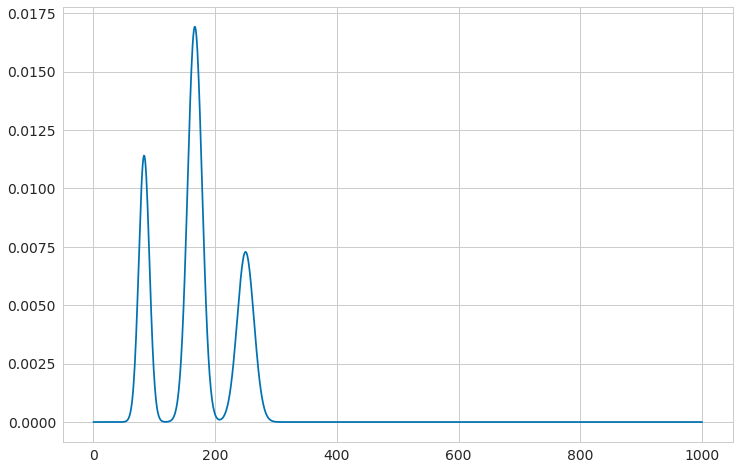

In [51]:
# Create a class for a linear combination of continuous rvs.
import scipy.stats as stats
class Mixture(stats.rv_continuous):
    def __init__(self, weights, distributions):
        super().__init__()
        assert(len(weights) == len(distributions) > 0)
        assert(sum(weights) == 1)
        self.weights = weights
        self.distributions = distributions
        
    def _pdf(self, x):
        return sum(self.weights[_] * self.distributions[_].pdf(x) for _ in range(len(self.weights)))

    def _cdf(self, x):
        return sum(self.weights[_] * self.distributions[_].cdf(x) for _ in range(len(self.weights)))
    
n = 1000; x = range(n + 1);
weights = (1/4, 1/2, 1/4)
thetas = (1/12, 1/6, 1/4)
dists = [stats.norm(n * theta, np.sqrt(n * theta * (1 - theta))) for theta in thetas]
y_approx = Mixture(weights, dists)
plt.plot(x, y_approx.pdf(x));

**(b)** Give approximate 5%, 25%, 50%, 75%, and 95% points for the distribution of $y$.

In [52]:
# We estimate the values directly, but note that treating this as three disjoint
# normal distributions with areas 1/4, 1/2, 1/4 will also work.
y_approx.ppf(quantiles)

array([ 75.9775017 , 118.00413349, 166.66666666, 206.45231656,
       261.52437336])

**5**. Let $y$ be the number of heads in $n$ spins of a coin whose probability of heads is $\theta$.

**(a)** If your prior distribution for $\theta$ is uniform on $[0, 1]$, derive your prior predictive distribution for $y$, $$
Pr(y = k) = \int_0^1 Pr(y = k \given \theta) \, d\theta
$$
for each $k = 0, 1, \ldots, n$.

$$
\int_0^1 Pr(y = k \given \theta) \, d\theta = \binom{n}{k} \int_0^1 \theta^k (1 - \theta)^{n - k} \, d\theta
$$
This integral is called a Beta integral, and it can be evaluated in terms of the [gamma function](https://en.wikipedia.org/wiki/Beta_function#Relationship_between_gamma_function_and_beta_function). 
$$
\int_0^1 \theta^k (1 - \theta)^{n - k} \, d\theta = 
  \frac{\Gamma(k + 1) \Gamma(n - k + 1)}{\Gamma(n + 2)}
$$
This evaluation is implied by the fact that the beta distribution
$$
B(\alpha, \beta) = \frac{\Gamma(\alpha + \beta)}{\Gamma(\alpha) \Gamma(\beta)} 
                            \theta^{\alpha - 1}(1 - \theta)^{\beta - 1}
$$
is, in fact, a distribution. Using the fact that, for integer $i$, $\Gamma(i) = (i - 1)!$ we have
$$
\int_0^1 Pr(y = k \given \theta) \, d\theta = \binom{n}{k} \frac{k! (n-k)!}{(n + 1)!} = \frac{1}{n + 1}.
$$

**(b)** Show that $\frac{\alpha + y}{\alpha + \beta + n}$ is between $\frac{\alpha}{\alpha + \beta}$ and $\frac{y}{n}$ for $0 \le y \le n$.

It suffices to show $\frac{a + c}{b + d}$ is between $\frac{a}{b}$ and $\frac{c}{d}$ when all are positive (the $y=0$ case is trivial). Assume WLOG $\frac{a}{b} \le \frac{c}{d} \implies ad \le bc$. Then
$$ab + ad \le ab + bc \implies a(b + d) \le b(a + c) \implies \frac{a}{b} \le \frac{a + c}{b + d}.$$
Similarly,
$$ad + cd \le bc + cd \implies (a + c) d \le (b + d) c \implies \frac{a + c}{b + d} \le \frac{c}{d}.$$

**(c)** Show that if the prior distribution on $\theta$ is uniform, the posterior variance is always less than the prior variance.

The uniform distribution has variance of $\frac{1}{12}$. We have $$
\begin{align}
Var(B(\alpha, \beta)) &= \frac{\alpha \beta}{(\alpha + \beta)^2 \cdot (\alpha + \beta + 1)} \\
&= \left(\frac{\alpha}{\alpha + \beta} \cdot \frac{\beta}{\alpha + \beta}\right)
                                       \cdot \frac{1}{\alpha + \beta + 1} \\
&< \left(\frac{1}{4} \right) \cdot \left(\frac{1}{3}\right) = \frac{1}{12},
\end{align}
$$
for $\alpha + \beta > 2$. (We used $x + y = 1 \implies xy \le \frac{1}{4}$).

**(d)** Give an example of $\alpha, \beta, y, n$ where the posterior variance is higher than the prior.

In [41]:
# Try a brute-force search on small examples
def loop(end):
    space = range(1, end)
    for y in space:
        for n in range(y, end):
            for a in space:
                for b in space:
                    prior = stats.beta(a, b).var()
                    posterior = stats.beta(a + y, b + n - y).var()
                    if posterior > prior:
                        return ((y, n, a, b), prior, posterior)
loop(5)                    

**6**. Derive the mean and variance of the negative binomial predictive distribution for the cancer rate example using the mean and variance formulas for conditional probabilities.

TODO

**7** **(a)** Show the uniform prior for the natural parameter of the exponential family $Bin(n, \theta)$ is $p(\theta) \propto \theta^{-1} (1 - \theta)^{-1}$.

We first rewrite $p(y \given n, \theta)$ in exponential form:
$$
\begin{align}
p(y \given n, \theta) &= \binom{n}{y} \theta^y (1 - \theta)^{n - y} \\
 &= \binom{n}{y} (1 - \theta)^{n} \left( \frac{\theta}{1 - \theta} \right)^y \\
 &= \binom{n}{y} (1 - \theta)^{n} e^{ y \ln \left( \frac{\theta}{1 - \theta} \right) }
\end{align}
$$

Describing the likelihood in the exponential form
$$
p(y \given n, \theta) = f(y) g(\theta) e^{\phi(\theta) u(y)}
$$
gives
$$\begin{align}
f(y) &= \binom{n}{y} \\
g(\theta) &= (1 - \theta)^n \\
\phi(\theta) &= \ln \left( \frac{\theta}{1 - \theta} \right) \\
u(y) &= y
\end{align}$$
and so $\phi(\theta) = \ln \left( \frac{\theta}{1 - \theta} \right)$ is the natural parameter. 

A uniform distribution on $p(\phi)$ gives a prior distribution on $\theta$:
$$\begin{align}
p_\phi(\phi) &\propto 1 \\
p_\theta(\theta) &=  p_\phi \left( \ln \frac{\theta}{1 - \theta} \right) \cdot
                \left| \frac{d}{d\theta} \left( \ln \frac{\theta}{1 - \theta} \right)  \right| \\
                &\propto 1 \cdot \frac{1}{\theta(1 - \theta)}.
\end{align}$$

**(b)** Show that if $y=0$ or $n$, the resulting posterior distribution is improper.

Putting the previous result back in exponential form we have 
$$\begin{align}
p(\theta) &\propto g(\theta)^\eta e^{\phi(\theta) \nu} \\
&= (1 - \theta)^{n \eta} e^{\nu \ln \left( \frac{\theta}{1 - \theta} \right) } \\
&= (1 - \theta)^{n \eta - \nu} \theta^{\nu} \\
&= (1 - \theta)^{-1} \theta^{-1}
\end{align}$$
which implies
$$\begin{align}
\eta &= \frac{-2}{n} \\
\nu &= -1
\end{align}$$
If we run a single trial (i.e., $n$ Bernoulli events with $y$ successes), the general machinery for exponential families states that we update to a posterior distribution using parameters
$$\begin{align}
\eta' &= \eta + 1\\
\nu' &= \nu + y.
\end{align}$$

It is straightforward to verify that this increases the power on $(1 - \theta)$ by $n - y$ and increases the power on $\theta$ by $y$. Hence if $y = 0$, we have 
$$
p(\theta \given y) \propto (1 - \theta)^{n - 1} \theta^{-1}
$$
which is improper. Equivalently, if $y = n$, we have
$$
p(\theta \given y) \propto (1 - \theta)^{-1} \theta^{n-1}
$$
which is also improper. With any other value of $y$, both powers will be non-negative, and we will have a proper beta distribution.

**8**. A random sample of $n$ students is drawn from a large population, and their weights are measured. The average weight of the sampled students is $\bar{y} = 150$ pounds. Assume the weights in the population are normally distributed with unknown mean $\theta$ and known standard deviation 20 pounds. Suppose your prior distribution for $\theta$ is normal with mean $180$ and standard deviation $40$.

**(a)** Give your posterior distribution for $\theta$. (Your answer will be a function of $n$).

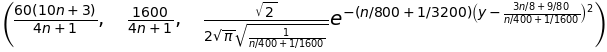

In [81]:
import sympy.stats as systats
y, n = sy.symbols('y n')

# Enter the given information
y_bar = 150
std_pop = 20
mu_prior = 180
std_prior = 40

# Compute the precisions, and the posterior parameters
pr_prior = sy.S(1) / (std_prior**2)
pr_pop = sy.S(1) / (std_pop**2)
mu_post = (mu_prior * pr_prior + n * y_bar * pr_pop) / (pr_prior + n * pr_pop)
std_post = sy.sqrt(sy.S(1) / (pr_prior + n * pr_pop))

# Define the posterior distribution
posterior_dist = systats.Normal('posterior', mu_post, std_post)
posterior = systats.density(posterior_dist)(y)
mu_post.simplify(), (std_post**2).simplify(), posterior

**(b)** A new student is sampled. Give the posterior predictive distribution.

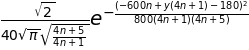

In [82]:
mu_pred = mu_post
std_pred = sy.sqrt(std_pop**2 + std_post**2)
pp = systats.Normal('pp', mu_pred, std_pred)
systats.density(pp)(y).simplify()

**(c)** For $n=10$ give a 95% posterior interval for $\theta$ and a 95% posterior predictive interval.

In [83]:
ci = [0.025, 0.975]
(stats.norm.ppf(ci, float(mu_post.subs({n:10})), float(std_post.subs({n:10}))),
stats.norm.ppf(ci, float(mu_pred.subs({n:10})), float(std_pred.subs({n:10}))))

(array([138.48790937, 162.97550526]), array([109.66476055, 191.79865408]))

**(d)** Do the same for $n = 100$.

In [84]:
(stats.norm.ppf(ci, float(mu_post.subs({n:100})), float(std_post.subs({n:100}))),
stats.norm.ppf(ci, float(mu_pred.subs({n:100})), float(std_pred.subs({n:100}))))

(array([146.15977574, 153.98985019]), array([110.68051078, 189.46911515]))

**9**. Suppose your prior dist for $\theta$, the proportion of Californians who support the death penalty, is beta with mean $0.6$ and standard deviation $0.3$.

**(a)** Determine the parameters $\alpha$ and $\beta$ of your prior distribution. Sketch the density function.

In [88]:
mu = sy.S(3)/5
std = sy.S(3)/10
ss = mu * (1 - mu) / (std**2) - 1
alpha = mu * ss
beta = ss - alpha
alpha, beta

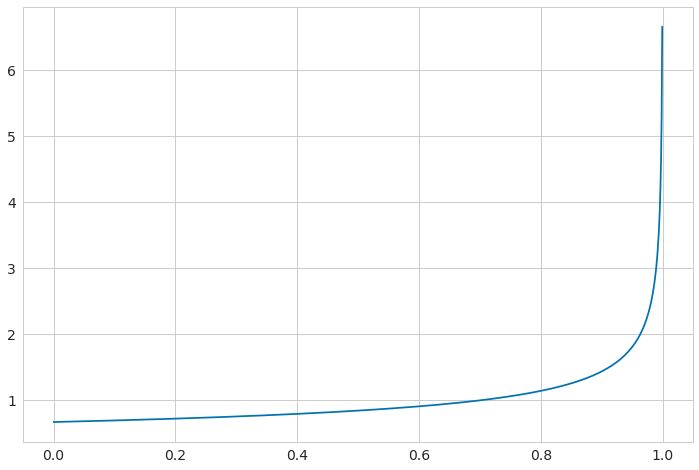

In [91]:
x = np.linspace(0, 1, 1000)
plt.plot(x, stats.beta.pdf(x, 1, 2/3));

**(b)** A random sample of 1000 Californians is taken and 65% support the death penalty. What are your posterior mean and variance for $\theta$? Draw the posterior density function.

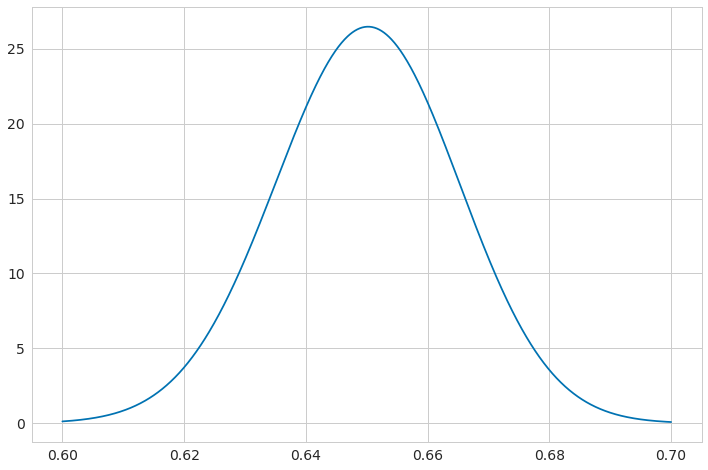

In [94]:
n = 1000
y = 0.65 * n
alpha_ = alpha + y
beta_ = beta + n - y
x = np.linspace(0.6, 0.7, 1000)
plt.plot(x, stats.beta.pdf(x, float(alpha_), float(beta_)))

**(c)** Examine the sensitivity of the posterior distribution to different prior means and widths, including a non-informative prior.

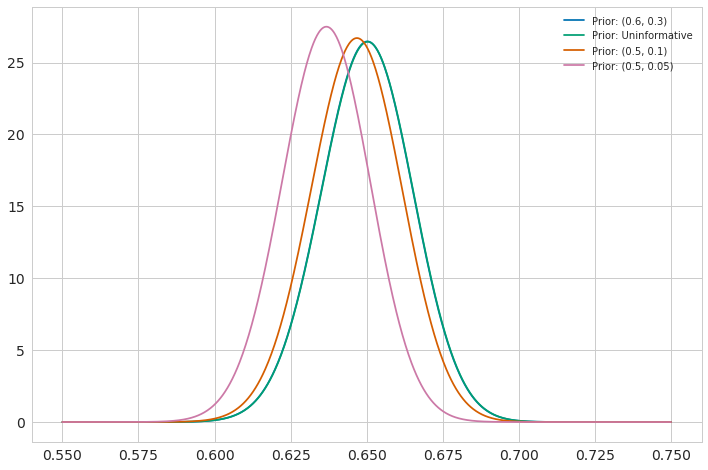

In [106]:
def alpha_beta(mu, std):
    ss = mu * (1 - mu) / (std**2) - 1
    alpha = mu * ss
    beta = ss - alpha
    return alpha, beta

x = np.linspace(0.55, 0.75, 1000)
plt.plot(x, stats.beta.pdf(x, float(alpha_), float(beta_)), label='Prior: (0.6, 0.3)')
plt.plot(x, stats.beta.pdf(x, y, n-y), label='Prior: Uninformative')
alpha, beta = alpha_beta(0.5, 0.1)
plt.plot(x, stats.beta.pdf(x, alpha + y, beta + n-y), label='Prior: (0.5, 0.1)')
alpha, beta = alpha_beta(0.5, 0.05)
plt.plot(x, stats.beta.pdf(x, alpha + y, beta + n-y), label='Prior: (0.5, 0.05)')
plt.legend();

**10**. Suppose there are $N$ cable cars in San Francisco, numbered sequentially from 1 to $N$. You see a cable car at random, it is numbered 203. You wish to estimate $N$.

**(a)** Assume your prior is geometric with mean 100. What is your posterior distribution for $N$?

$$
P(N \given y) \propto P(y \given N) \cdot P(N).
$$
Since $P(y=203 \given N) = \frac{1}{N}$ for $N \ge 203$, we have
$$
\frac{99^{N - 1}}{N \cdot 100^N}
$$
for $N \ge 203$.


In [128]:
N = sy.symbols('N')
prior = (1/100) * (99/100)**(N - 1)
denom = sy.Sum((1/N) * prior, (N, 203, sy.oo)).evalf()
posterior = prior / (N * denom)
denom, posterior

**(b)** What are the mean and standard deviation of $N$?

In [129]:
mean = sy.Sum(N * posterior, (N, 203, sy.oo))
std = sy.sqrt(sy.Sum(N**2 * posterior, (N, 203, sy.oo)) - mean**2)
mean.evalf(), std.evalf()

**(c)** Choose a reasonable 'noniformative' prior for $N$ and give the resulting posterior, mean and standard deviation for $N$.

The solutions point out that trying $p(N) \propto 1$ will give an improper posterior distribution, but choosing $p(N) \propto \frac{1}{N}$ will give a posterior that does converge. I'll add that while this is true, the posterior will have infinite mean and variance. Choosing $p(N) \propto \frac{1}{N^k}$ will lead to the first $k - 1$ moments of the posterior being finite.

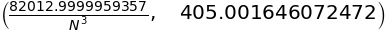

In [137]:
prior = 1/N**2  # Chosen so that the mean of the posterior will be finite.
denom = sy.Sum((1/N) * prior, (N, 203, sy.oo)).evalf()
posterior = prior / (N * denom)
mean = sy.Sum(N * posterior, (N, 203, sy.oo))
# std will not converge, so we don't compute it
posterior, mean.evalf()

**11**. Suppose $y_1, \dots, y_5$ are independent samples from a Cauchy distribution with unknown center $\theta$ and known scale $1$: $p(y_i \given \theta) \propto 1 / (1 + (y_i - \theta)^2)$. Assume that the prior distribution for $\theta$ is uniform on $[0, 100]$. The observations are given as $y_1, \dots, y_5) = (43, 44, 45, 46.5, 47.5)$.

**(a)** Compute the unnormalized posterior density function on a grid of points $\theta = 0, 1/m, 2/m, \dots, 100$ for some large integer $m$. Using the grid approximation compute and plot the normalized posterior density $p(\theta \given y)$ as a function of $\theta$.

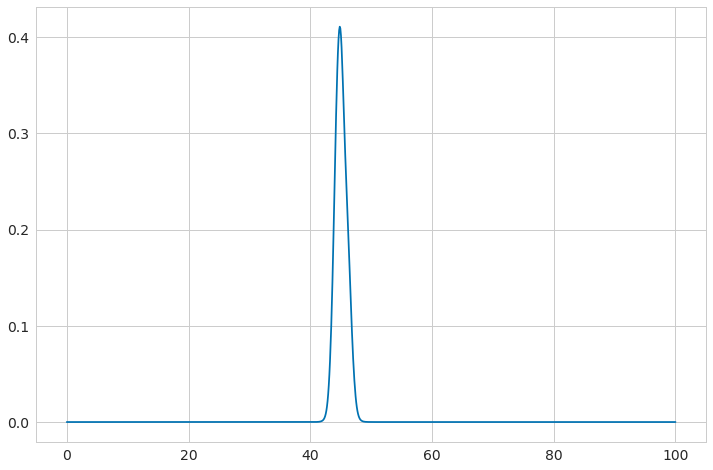

In [179]:
Y = np.array([43, 44, 45, 46.5, 47.5])
theta = sy.abc.theta
i, y = sy.symbols('i y')
Ydist = systats.Cauchy('Y', theta, 1)
likelihood = systats.density(Ydist)(y)
posterior = 1 # prior for theta
for y_i in Y:
    posterior *= likelihood.subs({y:y_i})
denom = sy.Integral(posterior, (theta, 0, 100)).evalf()
posterior = posterior / denom
posterior_fn = sy.lambdify(theta, posterior, 'numpy')
x = np.linspace(0, 100, 1000)
plt.plot(x, posterior_fn(x));

**(b)** Sample 1000 draws of $\theta$ from the posterior density and plot a histogram of the draws.

count    1000.000000
mean       45.108005
std         1.007420
min        42.359897
25%        44.405190
50%        45.043118
75%        45.775194
max        48.460066
dtype: float64

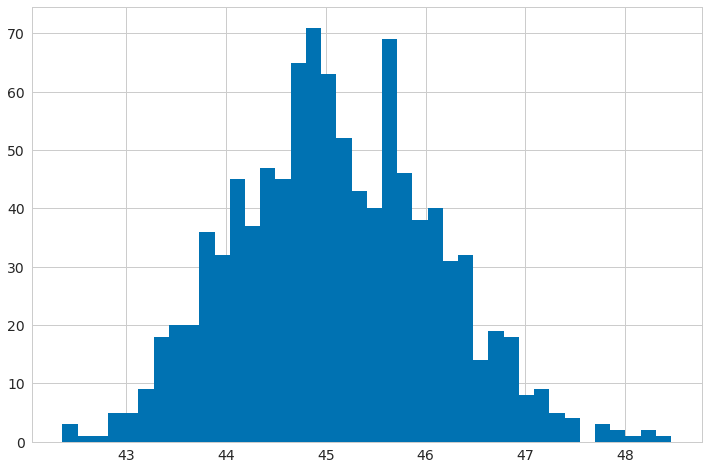

In [271]:
class ThetaPosterior(stats.rv_continuous):
    def _pdf(self, x):
        return posterior_fn(x)
    
    def _cdf(self, r):
        # This function is needed for .rvs to converge.
        n = 10000
        x = np.linspace(0, r, n)
        return np.sum(posterior_fn(x) / ((n + 1) / r))

theta_posterior = ThetaPosterior()
draws = theta_posterior.rvs(size=1000)
plt.hist(draws, 40);
import pandas as pd
pd.Series(draws).describe()

**(c)** Use the 1000 samples of $\theta$ to obtain 1000 samples from the predictive distribution of a future observation, and plot a histogram of the predictive draws.

count    1000.000000
mean       43.057774
std        31.080608
min      -605.678664
25%        43.574249
50%        44.965414
75%        46.429880
max       209.659623
dtype: float64

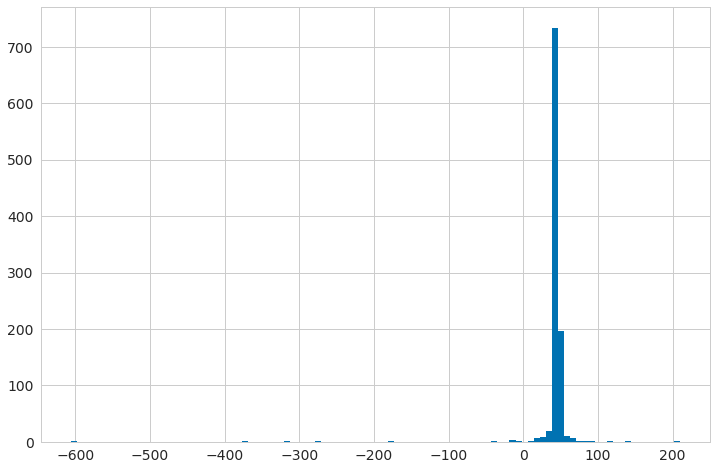

In [272]:
# Cauchy distribution is pathological
predictive = [stats.cauchy.rvs(theta, 1) for theta in draws]
plt.hist(predictive, 100);
pd.Series(predictive).describe()

### Redoing this exercise with pymc3

In [273]:
import pymc3 as pm

with pm.Model() as model:
    # Prior for model parameter
    theta = pm.Uniform('theta', lower=0, upper=100)
    
    # Likelihood of observations
    Y_obs = pm.Cauchy('Y_obs', theta, 1, observed=Y)
    
    # Predictive distribution
    y = pm.Cauchy('y', theta, 1)

In [274]:
with model:
    trace = pm.sample(1000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [y, theta_interval__]
100%|██████████| 1500/1500 [00:06<00:00, 230.98it/s]
/home/jbandlow/anaconda3/lib/python3.6/site-packages/scipy/signal/signaltools.py:375: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  complex_result = (np.issubdtype(in1.dtype, complex) or
/home/jbandlow/anaconda3/lib/python3.6/site-packages/scipy/signal/signaltools.py:376: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  np.issubdtype(in2.dtype, complex))
The acceptance probability does not match the target. It is 0.9033329121229412, but should be close to 0.8. Try to increase the number of tuning ste

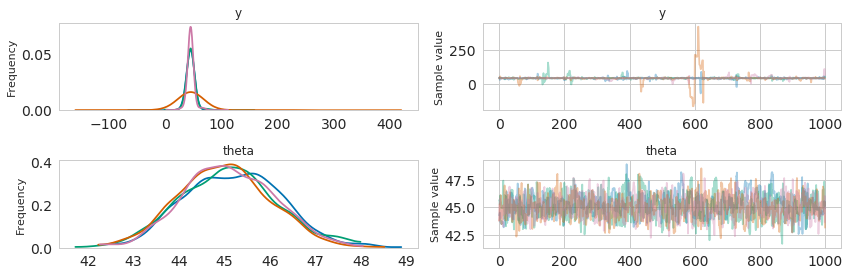

In [275]:
pm.traceplot(trace);

In [276]:
pm.summary(trace).round(2)

/home/jbandlow/anaconda3/lib/python3.6/site-packages/scipy/signal/signaltools.py:375: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  complex_result = (np.issubdtype(in1.dtype, complex) or
/home/jbandlow/anaconda3/lib/python3.6/site-packages/scipy/signal/signaltools.py:376: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  np.issubdtype(in2.dtype, complex))


,mean,sd,mc_error,hpd_2.5,hpd_97.5,n_eff,Rhat
y,45.20,19.14,1.18,27.62,57.72,403.62,1.0
theta,45.09,1.02,0.03,43.01,46.98,768.21,1.0


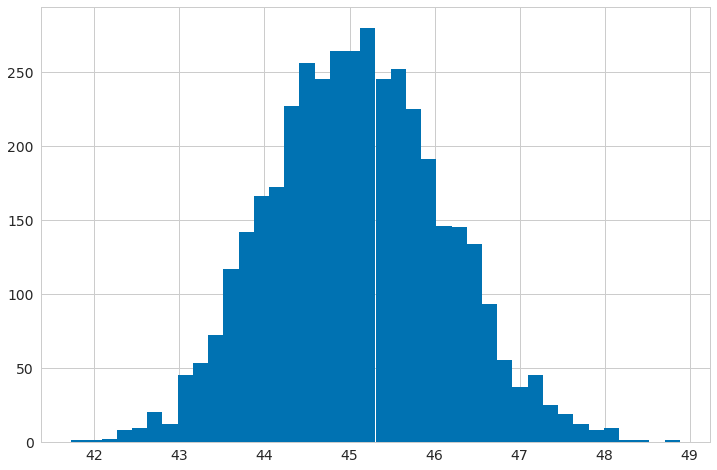

In [277]:
plt.hist(trace['theta'], 40);

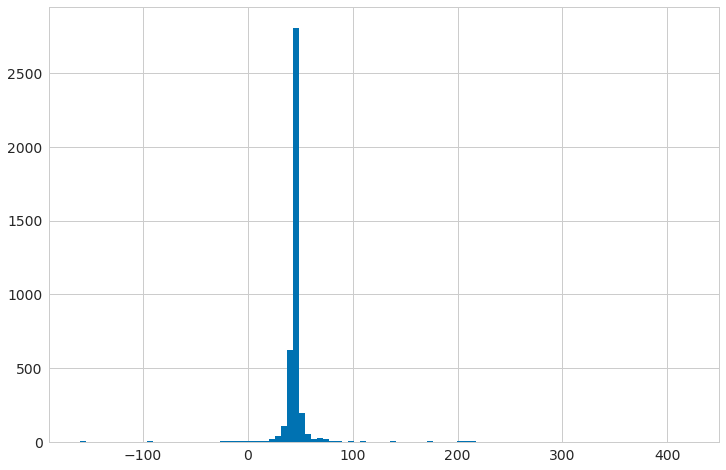

In [278]:
plt.hist(trace['y'], 100);

**12** (Pen and paper exercise todo)

**13**. Data are given for the number of fatal accidents and deaths on scheduled airline flights per year, over a ten-year period.

In [287]:
flight_data = pd.DataFrame({
    'year': range(1976, 1986),
    'fatal_accidents': [24,25,31,31,22,21,26,20,16,22],
    'deaths': [734,516,754,877,814,362,764,809,223,1066],
    'death_rate': np.array([19,12,15,16,14,6,13,13,3,15]) / 100
})
flight_data

,death_rate,deaths,fatal_accidents,year
0,0.19,734,24,1976
1,0.12,516,25,1977
2,0.15,754,31,1978
3,0.16,877,31,1979
4,0.14,814,22,1980
5,0.06,362,21,1981
6,0.13,764,26,1982
7,0.13,809,20,1983
8,0.03,223,16,1984
9,0.15,1066,22,1985


**(a)** Assume that the numbers of fatal accidents in each year are independent with a Poisson$(\theta)$ distribution. Set a prior distribution for $\theta$, and determine the posterior distribution based on the data from 1976 through 1985. Under this model, give a 95% predictive interval for the number of fatal accidents in 1986.

In [319]:
with pm.Model() as accidents_model:
    # Prior for model parameter
    theta = pm.Gamma('theta', alpha=2.38, beta=.1)
    
    # Likelihood of observations
    Y_obs = pm.Poisson('Y_obs', theta, observed=flight_data.fatal_accidents)
    
    # Predictive distribution
    y = pm.Poisson('y', theta)

Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>NUTS: [theta_log__]
>Metropolis: [y]
100%|██████████| 50500/50500 [00:33<00:00, 1496.78it/s]
/home/jbandlow/anaconda3/lib/python3.6/site-packages/scipy/signal/signaltools.py:375: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  complex_result = (np.issubdtype(in1.dtype, complex) or
/home/jbandlow/anaconda3/lib/python3.6/site-packages/scipy/signal/signaltools.py:376: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  np.issubdtype(in2.dtype, complex))
The acceptance probability does not match the target. It is 0.8937200896240514, but should be close to 0.8. Try to increase the number of tuning steps.
The number of effective samples is smaller tha

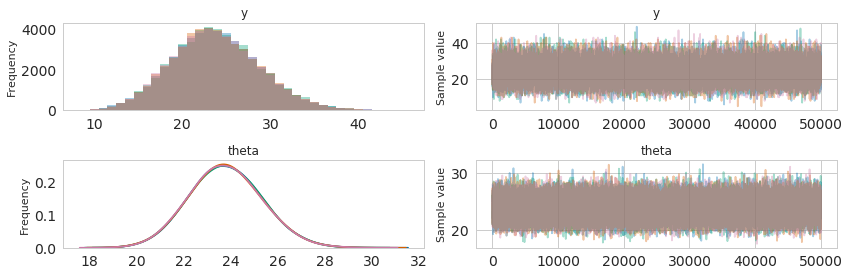

In [320]:
with accidents_model:
    trace = pm.sample(50000)
pm.traceplot(trace);

In [321]:
pm.summary(trace).round(2)

/home/jbandlow/anaconda3/lib/python3.6/site-packages/scipy/signal/signaltools.py:375: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  complex_result = (np.issubdtype(in1.dtype, complex) or
/home/jbandlow/anaconda3/lib/python3.6/site-packages/scipy/signal/signaltools.py:376: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  np.issubdtype(in2.dtype, complex))


,mean,sd,mc_error,hpd_2.5,hpd_97.5,n_eff,Rhat
y,23.79,5.09,0.03,15.00,34.00,29934.87,1.0
theta,23.80,1.53,0.01,20.83,26.84,64166.15,1.0


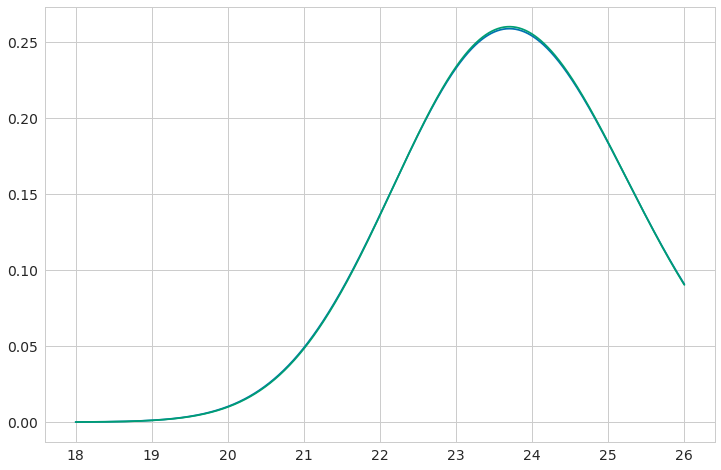

In [318]:
x = np.linspace(18, 26, 1000)
plt.plot(x, stats.gamma.pdf(x, 238, scale=1/10))
plt.plot(x, stats.gamma.pdf(x, 238+2.38, scale=1/10.1));

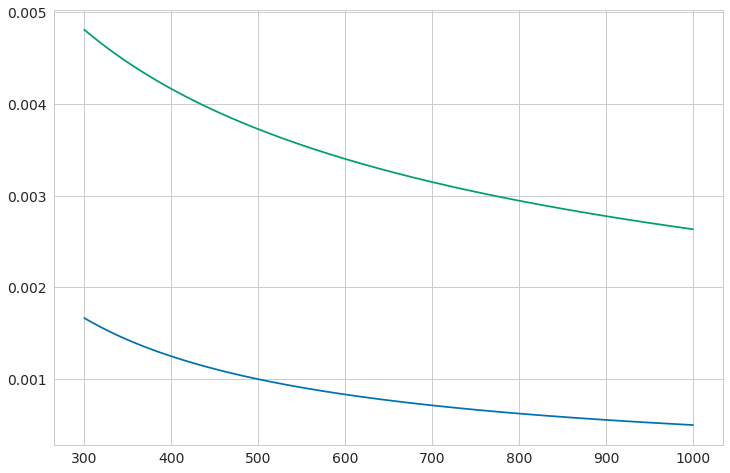

In [330]:
x = np.linspace(300, 1000, 10000)
plt.plot(x, 1/(2*x))
plt.plot(x, 1/12*np.sqrt(1/x))